# Get the Data

**Source: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset**

In [284]:
# Import Required 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from zipfile import ZipFile

In [285]:
# Load and Import Dataset
with ZipFile('./dataset/Diabetes prediction dataset.zip') as zObject:
    zObject.extractall('./dataset')

dataset = pd.read_csv('./dataset/diabetes_prediction_dataset.csv')

# Split into Trian and Test Sets

In [178]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.25, random_state=42)

X_train = train_set.drop('diabetes', axis=1)
X_test = test_set.drop('diabetes', axis=1)
y_train = train_set['diabetes'].copy()
y_test = test_set['diabetes'].copy()

# Data Analysis and Visualization

In [5]:
dataset.head()

gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0

In [157]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


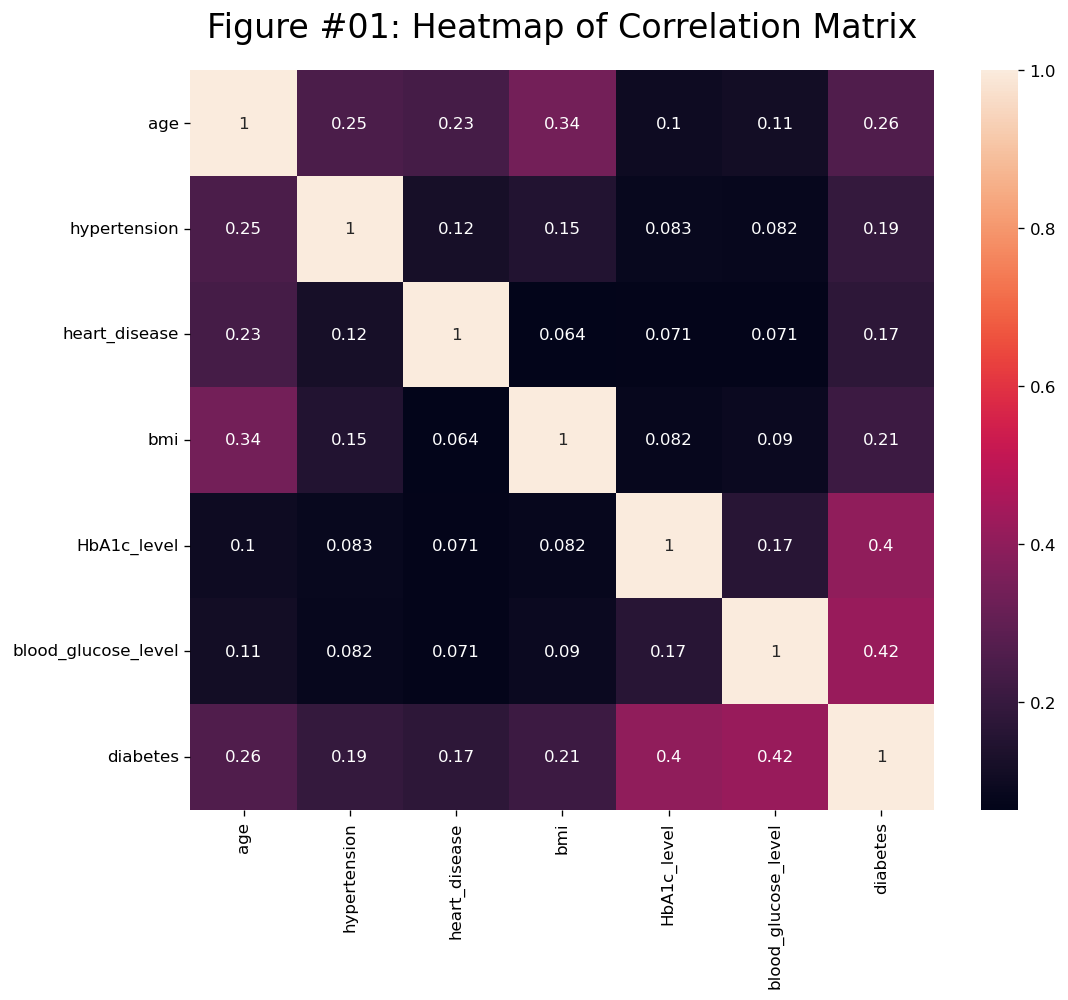

In [324]:
import seaborn as sns

plt.figure(dpi=120, figsize=(10, 8))
sns.heatmap(train_set.drop(['gender', 'smoking_history'], axis=1).corr(), annot=True)
plt.title('Figure #01: Heatmap of Correlation Matrix', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #01: Heatmap of Correlation Matrix.png')
plt.show()

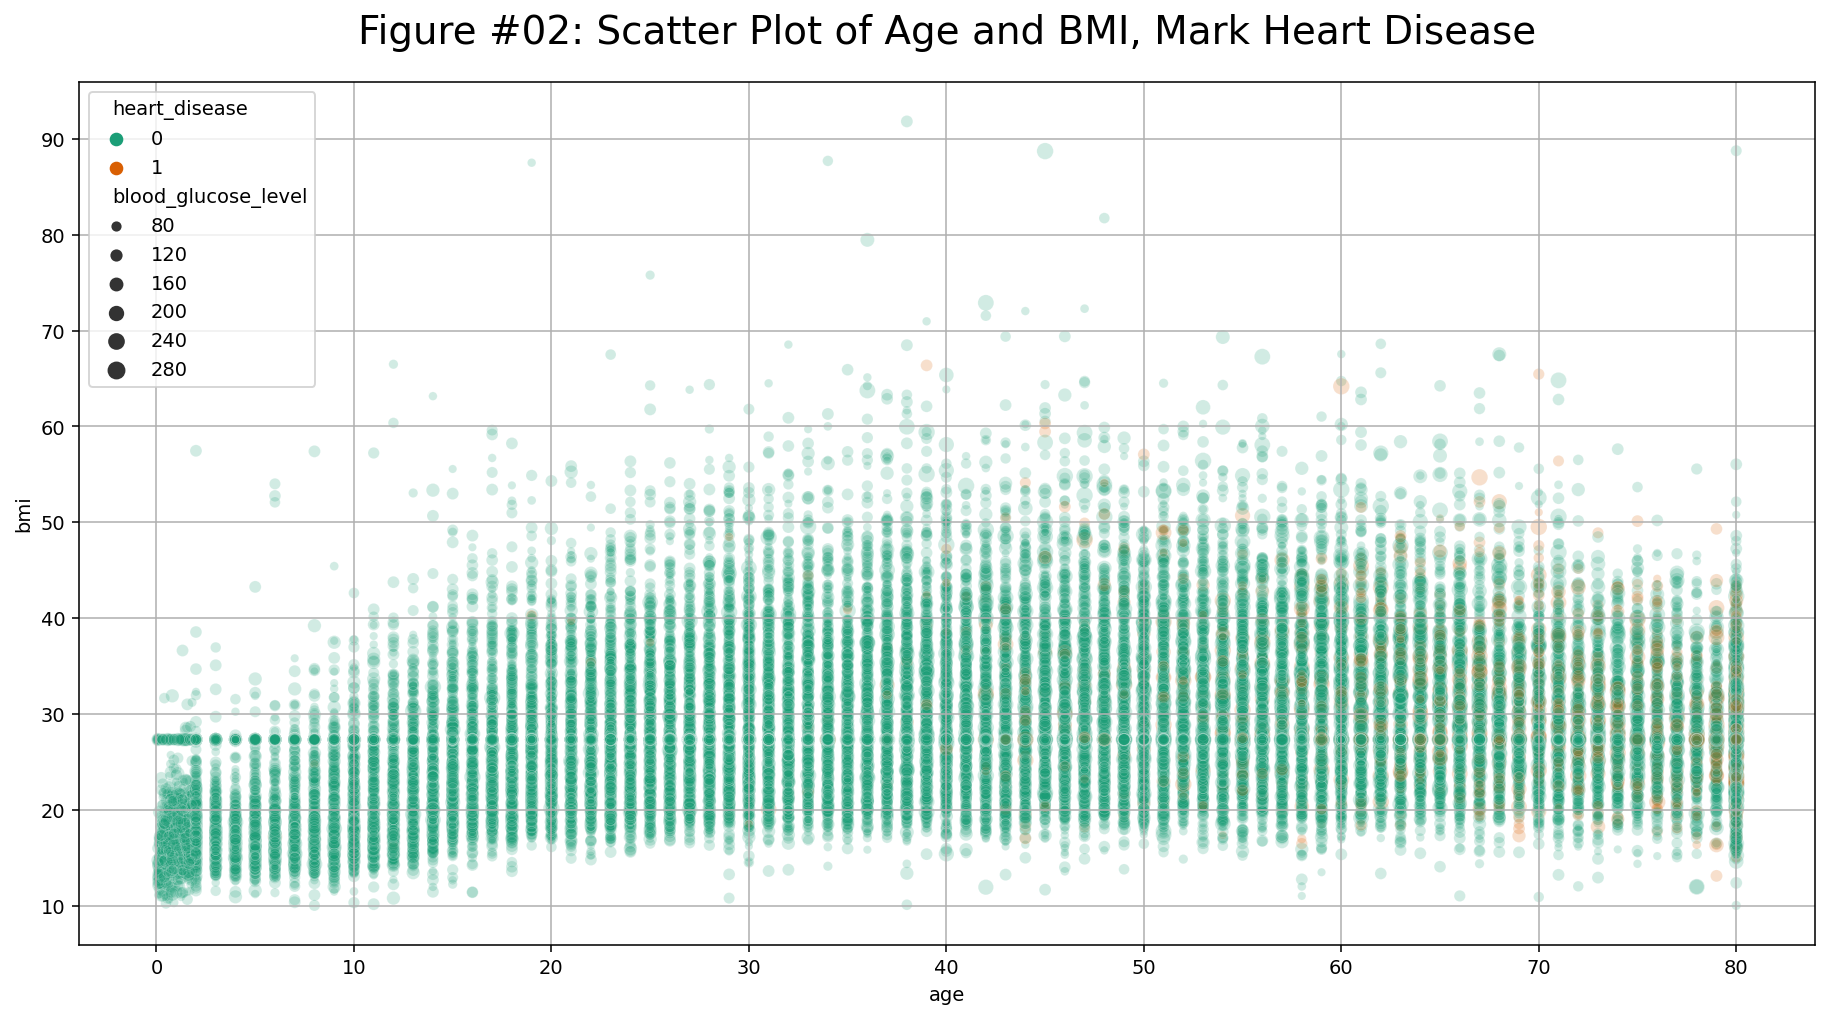

In [325]:
import seaborn as sns

plt.figure(dpi=140, figsize=(16, 8))
sns.scatterplot(x='age', y='bmi', data=train_set, alpha=0.2, hue='heart_disease', size='blood_glucose_level', palette='Dark2')
plt.grid()
plt.title('Figure #02: Scatter Plot of Age and BMI, Mark Heart Disease', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #02: Scatter Plot of Age and BMI, Mark Heart Disease.png')
plt.show()

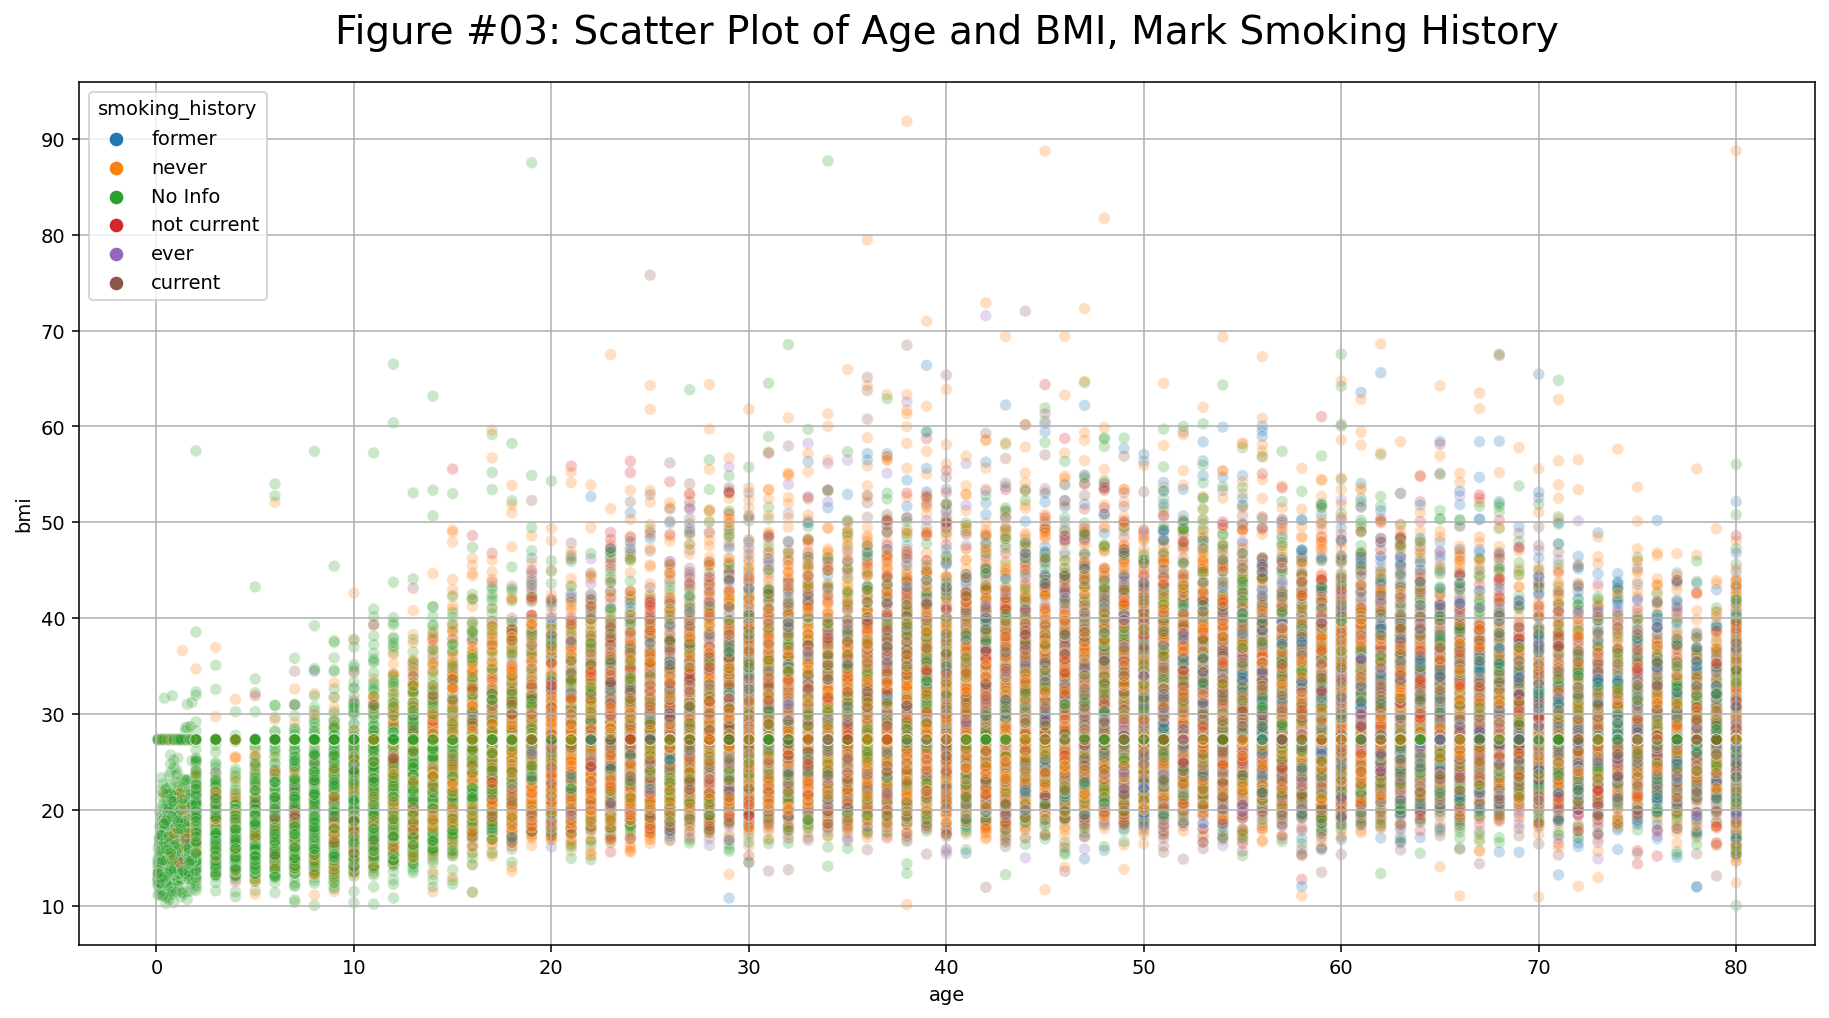

In [326]:
plt.figure(dpi=140, figsize=(16, 8))
sns.scatterplot(x='age', y='bmi', data=train_set, hue='smoking_history', alpha=0.25)
plt.grid()
plt.title('Figure #03: Scatter Plot of Age and BMI, Mark Smoking History', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #03: Scatter Plot of Age and BMI, Mark Smoking History.png')
plt.show()

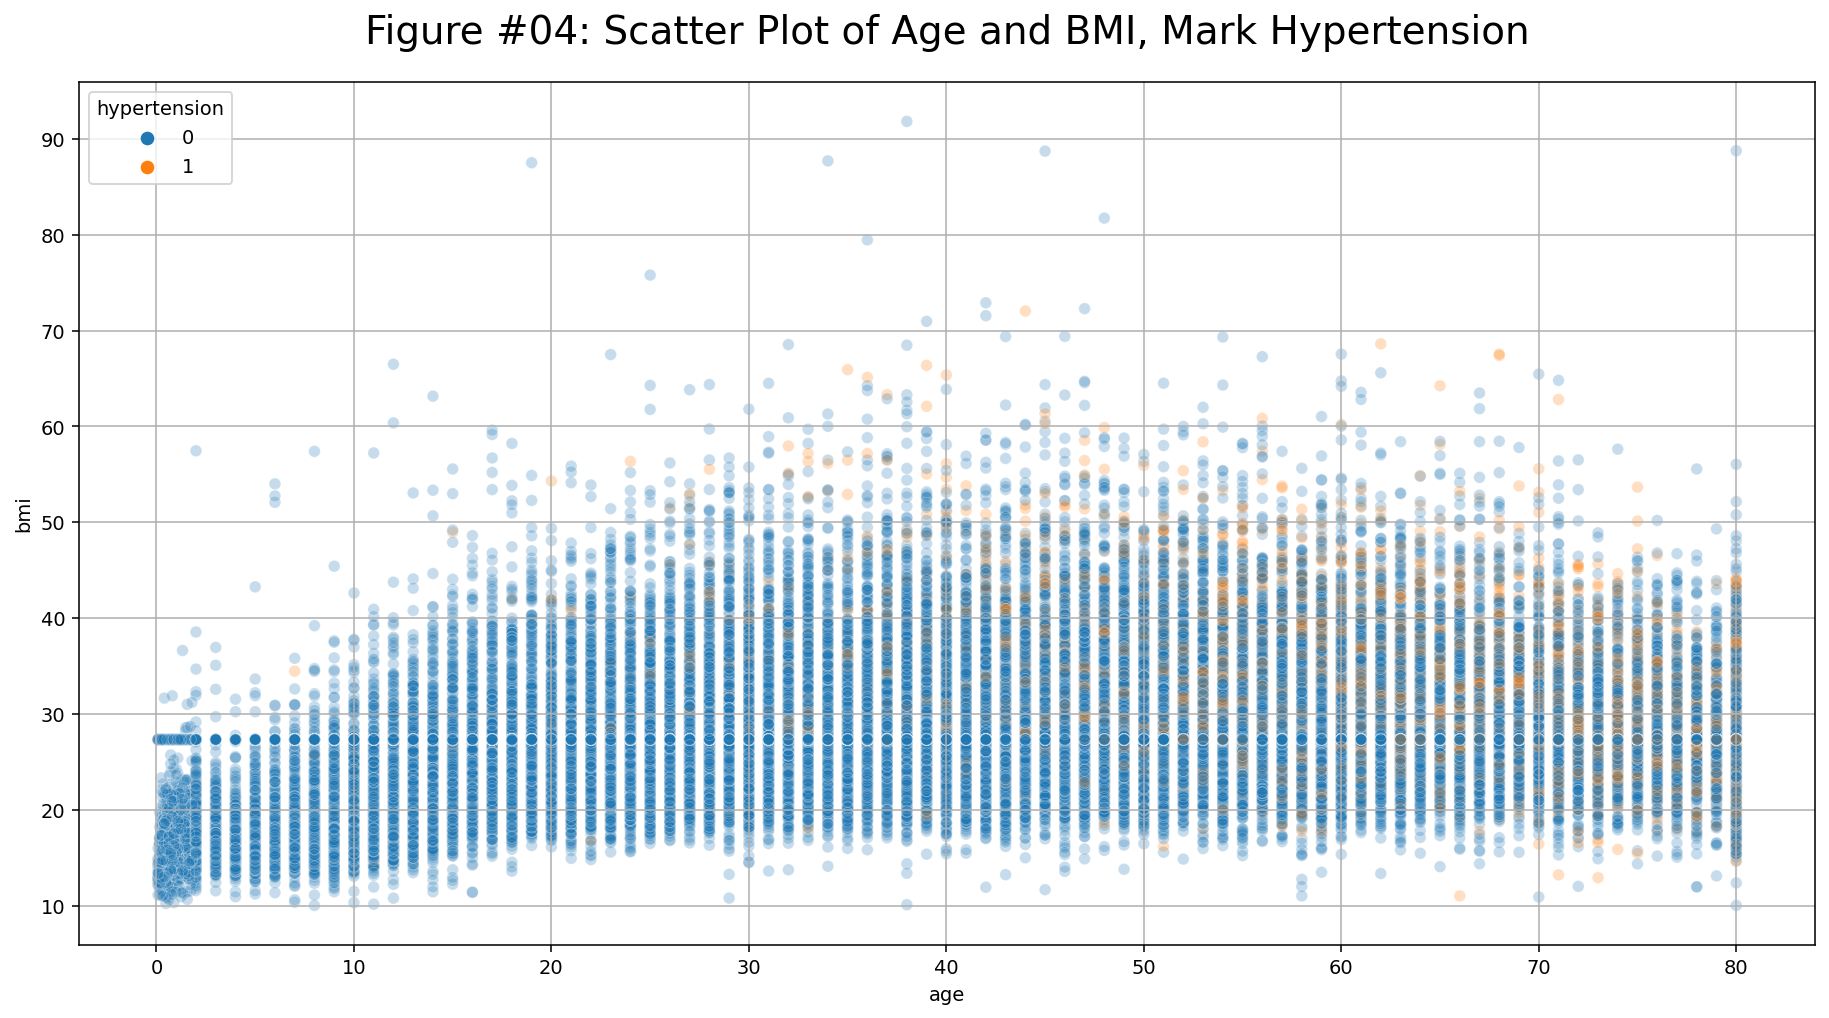

In [327]:
plt.figure(dpi=140, figsize=(16, 8))
sns.scatterplot(x='age', y='bmi', data=train_set, hue='hypertension', alpha=0.25)
plt.grid()
plt.title('Figure #04: Scatter Plot of Age and BMI, Mark Hypertension', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #04: Scatter Plot of Age and BMI, Mark Hypertension.png')
plt.show()

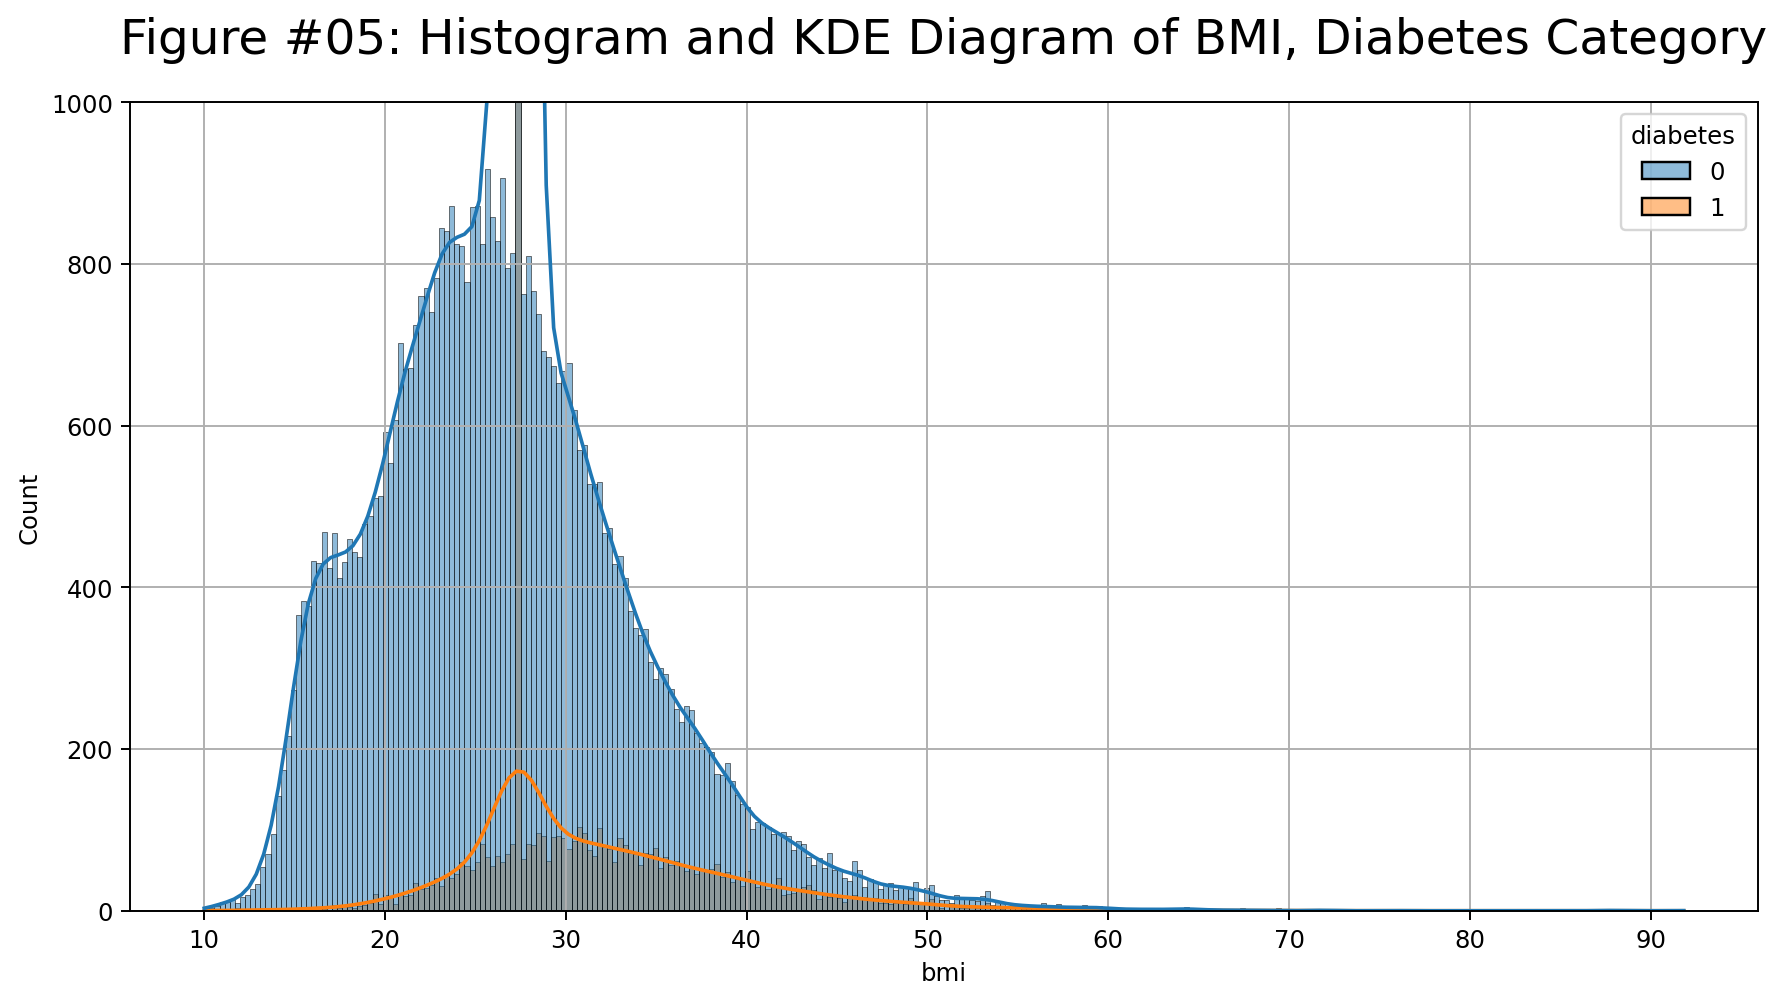

In [328]:
plt.figure(dpi=175, figsize=(12, 6))
sns.histplot(x='bmi', data=train_set, hue='diabetes', alpha=0.5, kde=True)
plt.ylim([0, 1000])
plt.grid()
plt.title('Figure #05: Histogram and KDE Diagram of BMI, Diabetes Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #05: Histogram and KDE Diagram of BMI, Diabetes Category.png')
plt.show()

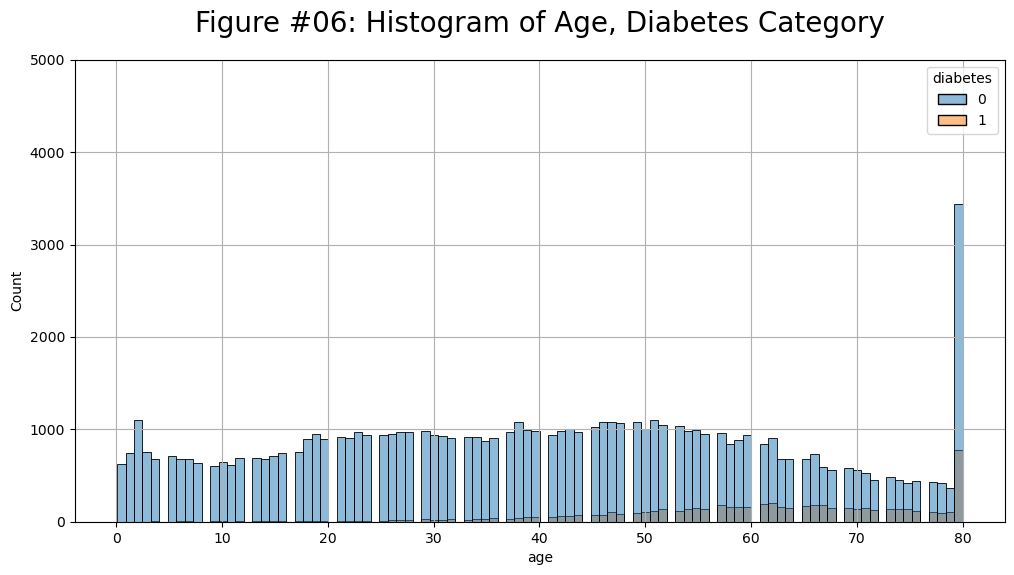

In [329]:
plt.figure(dpi=100, figsize=(12, 6))
sns.histplot(x='age', data=train_set, hue='diabetes', alpha=0.5, bins=100)
plt.ylim([0, 5000])
plt.grid()
plt.title('Figure #06: Histogram of Age, Diabetes Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #06: Histogram of Age, Diabetes Category.png')
plt.show()

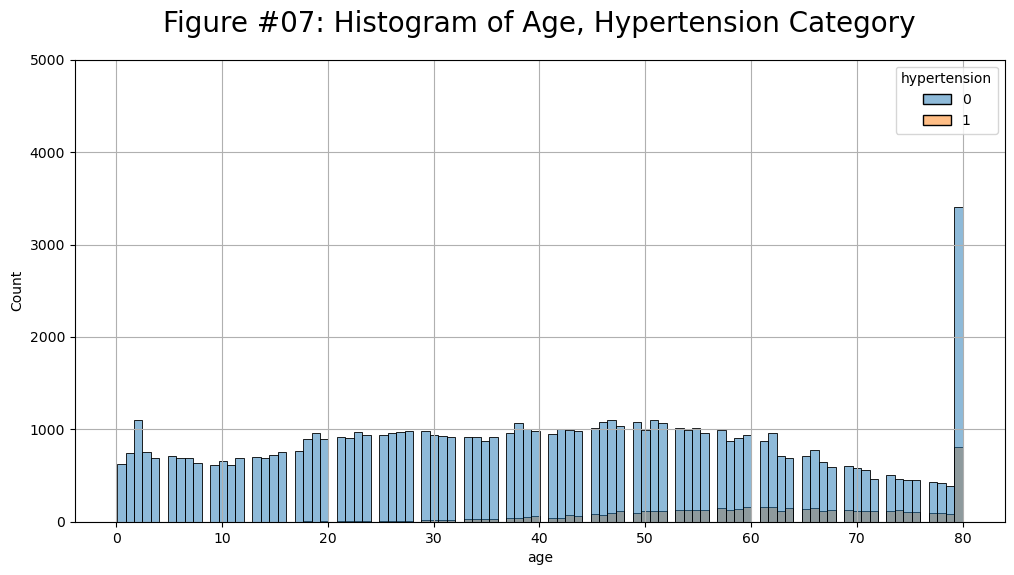

In [330]:
plt.figure(dpi=100, figsize=(12, 6))
sns.histplot(x='age', data=train_set, hue='hypertension', alpha=0.5, bins=100)
plt.ylim([0, 5000])
plt.grid()
plt.title('Figure #07: Histogram of Age, Hypertension Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #07: Histogram of Age, Hyptertension Category.png')
plt.show()

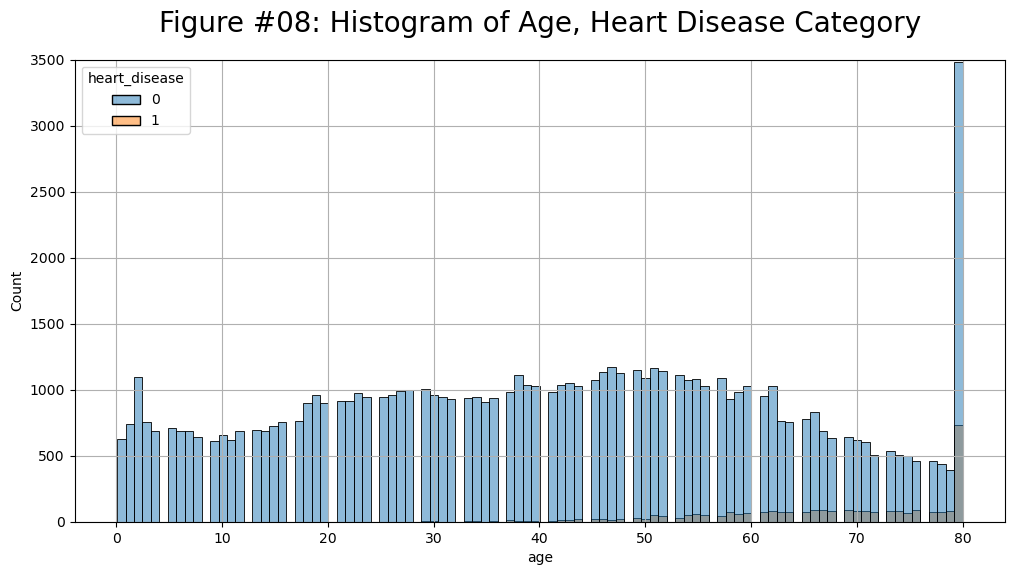

In [331]:
plt.figure(dpi=100, figsize=(12, 6))
sns.histplot(x='age', data=train_set, hue='heart_disease', alpha=0.5, bins=100)
plt.ylim([0, 3500])
plt.grid()
plt.title('Figure #08: Histogram of Age, Heart Disease Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #08: Histogram of Age, Heart Disease Category.png')
plt.show()

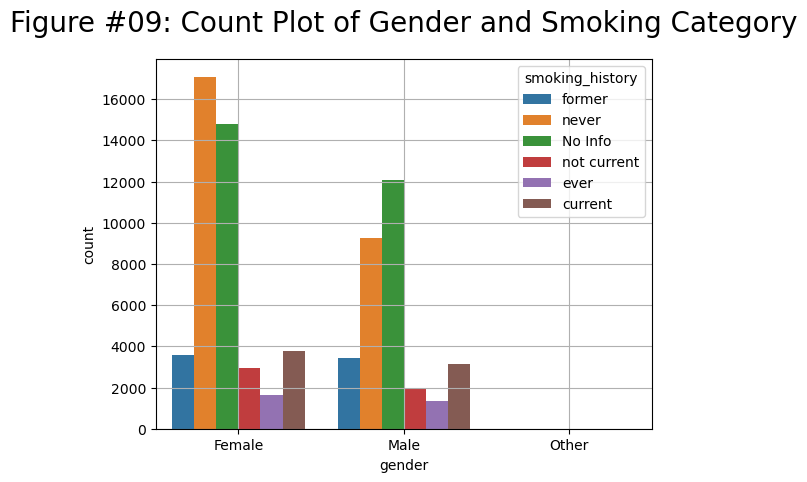

In [332]:
plt.figure()
sns.countplot(x='gender', data=train_set, hue='smoking_history')
plt.grid()
plt.title('Figure #09: Count Plot of Gender and Smoking Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #09: Count Plot of Gender and Smoking Category.png')
plt.show()

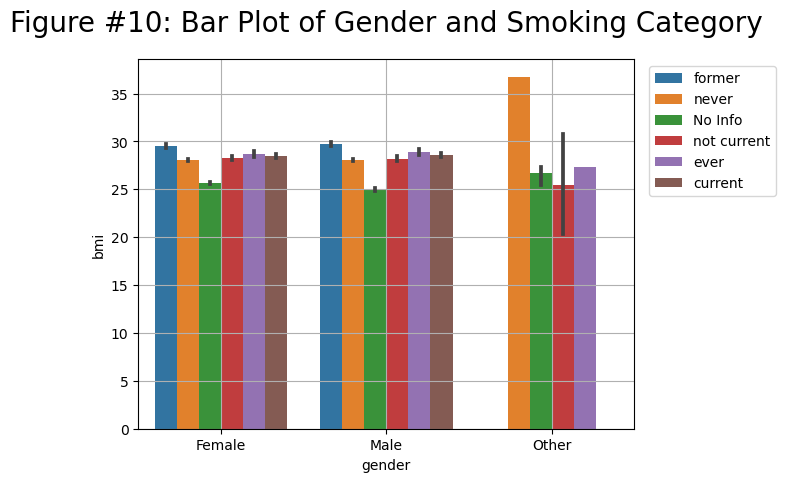

In [333]:
plt.figure()
sns.barplot(x='gender', y='bmi', data=train_set, hue='smoking_history')
plt.grid()
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title('Figure #10: Bar Plot of Gender and Smoking Category', fontsize=20, pad=20)
plt.savefig('./visualization_images/Figure #10: Bar Plot of Gender and Smoking Category.png')
plt.show()

# Data Preprocessing 

In [79]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin

class CombineAttributes(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        combined_attribues = pd.DataFrame({
            'age_bmi': X['age'] * X['bmi'],
            'age_heart_disease': X['age'] ** (X['heart_disease'] + 1),
            'age_hypertension': X['age'] ** (X['hypertension'] + 1)
        })
        result = pd.concat([X, combined_attribues], axis=1)
        return result

In [301]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

column_transformer = ColumnTransformer([
    ('categorical_preprocessing', OneHotEncoder(), ['gender', 'smoking_history', 'hypertension', 'heart_disease']),
    ('numerical_preprocessing', MinMaxScaler(), ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])
])

full_pipeline = Pipeline([
    ('combine_attributes', CombineAttributes()),
    ('column_transformer', column_transformer)
])

X_train_prepared = full_pipeline.fit_transform(X_train, y_train)

# Model Selection

In [302]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_predict

def evaluate_model(model, X, y, cv=3):
    model.fit(X, y)
    # Reporting Metrices on Seen Data
    y_pred_seen = model.predict(X)
    accuracy_seen = sum(y == y_pred_seen) / len(y_train)
    precision_seen = precision_score(y, y_pred_seen)
    recall_seen = recall_score(y, y_pred_seen)
    fpr_seen, tpr_seen, thresholds_seen = roc_curve(y, y_pred_seen)
    print('Accuracy on seen data: {:.4f}'.format(accuracy_seen * 100))
    print('Precision score on seen data: {:.4f}'.format(precision_seen))
    print('Recall score on seen data: {:.4f}'.format(recall_seen))
    print('AUC seen: {:.4f}'.format(auc(fpr_seen, tpr_seen) * 100))
    
    print('-' * 40)
    
    # Reporting Metrics on Unseen Data
    y_pred_unseen = cross_val_predict(model, X, y, cv=cv)
    accuracy_unseen = sum(y == y_pred_unseen) / len(y_train)
    precision_unseen = precision_score(y, y_pred_unseen)
    recall_unseen = recall_score(y, y_pred_unseen)
    fpr_unseen, tpr_unseen, thresholds_unseen = roc_curve(y, y_pred_unseen)
    print('Accuracy on unseen data: {:.4f}'.format(accuracy_unseen * 100))
    print('Precision score on seen data: {:.4f}'.format(precision_unseen))
    print('Recall score on seen data: {:.4f}'.format(recall_unseen))
    print('AUC unseen: {:.4f}'.format(auc(fpr_unseen, tpr_unseen) * 100))

In [258]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(max_iter=10000000)
evaluate_model(log_clf, X_train_prepared, y_train)

Accuracy on seen data: 96.0840
Precision score on seen data: 0.8776
Recall score on seen data: 0.6246
AUC seen: 80.8256
----------------------------------------
Accuracy on unseen data: 96.0867
Precision score on seen data: 0.8811
Recall score on seen data: 0.6217
AUC unseen: 80.6984


In [259]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()
evaluate_model(sgd_clf, X_train_prepared, y_train)

Accuracy on seen data: 96.1280
Precision score on seen data: 0.8974
Recall score on seen data: 0.6128
AUC seen: 80.3137
----------------------------------------
Accuracy on unseen data: 96.0693
Precision score on seen data: 0.9069
Recall score on seen data: 0.5970
AUC unseen: 79.5671


In [260]:
from sklearn.svm import SVC

svm_clf = SVC()
evaluate_model(svm_clf, X_train_prepared, y_train)

Accuracy on seen data: 96.2133
Precision score on seen data: 0.9733
Recall score on seen data: 0.5683
AUC seen: 78.3452
----------------------------------------
Accuracy on unseen data: 96.1467
Precision score on seen data: 0.9686
Recall score on seen data: 0.5631
AUC unseen: 78.0730


In [261]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
evaluate_model(knn_clf, X_train_prepared, y_train)

Accuracy on seen data: 96.9880
Precision score on seen data: 0.9532
Recall score on seen data: 0.6775
AUC seen: 83.7203
----------------------------------------
Accuracy on unseen data: 96.0360
Precision score on seen data: 0.8895
Recall score on seen data: 0.6072
AUC unseen: 80.0133


In [262]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
evaluate_model(forest_clf, X_train_prepared, y_train)

Accuracy on seen data: 99.9320
Precision score on seen data: 0.9995
Recall score on seen data: 0.9924
AUC seen: 99.6199
----------------------------------------
Accuracy on unseen data: 97.0280
Precision score on seen data: 0.9467
Recall score on seen data: 0.6877
AUC unseen: 84.2067


In [263]:
from sklearn.ensemble import GradientBoostingClassifier

xgb_clf = GradientBoostingClassifier()
evaluate_model(xgb_clf, X_train_prepared, y_train)

Accuracy on seen data: 97.2480
Precision score on seen data: 0.9890
Recall score on seen data: 0.6825
AUC seen: 84.0910
----------------------------------------
Accuracy on unseen data: 97.1987
Precision score on seen data: 0.9823
Recall score on seen data: 0.6814
AUC unseen: 84.0141


# Fine Tune

In [305]:
from sklearn.model_selection import GridSearchCV
from joblib import parallel_backend

param_grid = [
    {'n_estimators': [100, 140], 'max_features': [6, 8, 9], 'max_depth': [3, 5, 6]}
]

forest_reg = RandomForestClassifier()
grid_search_forest = GridSearchCV(forest_reg, param_grid,
                           cv=10, 
                           scoring='accuracy', 
                           return_train_score=True)

with parallel_backend('threading', n_jobs=-1):
    grid_search_forest.fit(X_train_prepared, y_train)
print(grid_search_forest.best_params_)

{'max_depth': 3, 'max_features': 6, 'n_estimators': 100}


In [ ]:
cvResults = grid_search_forest.cv_results_
for mean_score, params in zip(cvResults['mean_test_score'], cvResults['params']):
    print(np.sqrt(-mean_score), params)

In [308]:
finalModel = grid_search_forest.best_estimator_
# print('Feature Importances:', finalModel.feature_importances_)

# Evaluate Performance on the Test Set

In [323]:
X_test_prepared = full_pipeline.transform(X_test)
y_test_pred = finalModel.predict(X_test_prepared)
test_set_accuracy = sum(y_test == y_test_pred) * 100 / len(y_test)
print('Final accuracy on the test set: {}'.format(test_set_accuracy))

Final accuracy on the test set: 97.116
